### <center>M2 SID - Analyse et exploitation de données</center>
# <center>Image - TP1 : Indexation d'images par la texture</center>
## <center>Emma Grandgirard</center>

In [1]:
import scipy.misc
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import *
import numpy as np
import os

os.chdir(os.path.join(os.getcwd(), 'Images', 'Images'))

## 1. Observations et expérimentations dans l'espace de Fourier

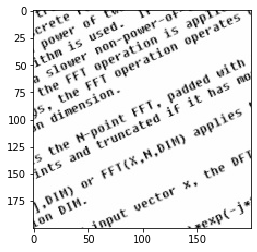

In [3]:
img = imread('TP1.jpg')
plt.imshow(img, cmap='Greys_r')

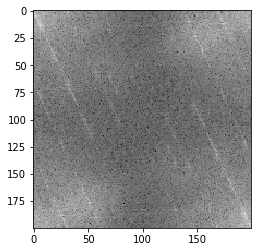

In [4]:
transform = np.log(np.abs(np.fft.fft2(img)))
plt.imshow(transform, cmap='Greys_r')

➡ Les fréquences d'amplitude maximale sont disposées dans le sens inverse des lignes du texte.

## 2. Construction d'un descripteur pour différentes classes de texture

In [5]:
list_images = os.listdir()

### Exemple sur une image

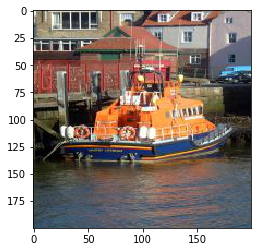

In [6]:
img = imread(list_images[49])
plt.imshow(img, cmap='Greys_r')

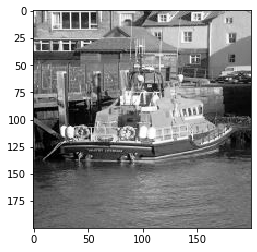

In [7]:
img_ng = np.mean(img, axis=2)  # niveaux de gris
plt.imshow(img_ng, cmap='Greys_r')

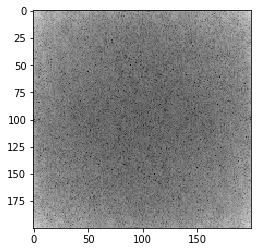

In [8]:
# spectre (transformée de Fourier)
transform = np.log(np.abs(np.fft.fft2(img_ng)))
plt.imshow(transform, cmap='Greys_r')

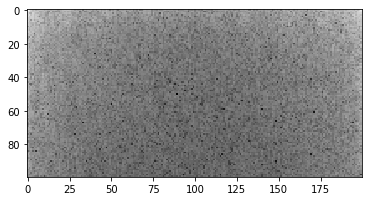

In [9]:
sp_sg = transform[:int(img.shape[0]/2)]  # moitié supérieure du spectre
plt.imshow(sp_sg, cmap='Greys_r')

### Fonction descripteur

In [10]:
def descripteur(img, nbBlocV, nbBlocH):
    '''
    In: image, nombre de blocs à la verticale, nombre de blocs à l'horizontale
    Out: log énergie moyenne pour chaque bloc
    '''
    img_ng = np.mean(img, axis=2)  # niveaux de gris
    transform = np.abs(np.fft.fft2(img_ng))  # spectre (transformée de Fourier)
    sp_sg = transform[:int(img.shape[0]/2)]  # moitié supérieure du spectre
    axeV = np.arange(0, int(img.shape[0]/2), int(img.shape[0]/(nbBlocV*2)))
    axeH = np.arange(0, int(img.shape[0]), int(img.shape[1]/nbBlocH))

    vals = []
    # on parcourt les blocs
    for v in range(nbBlocV):
        for h in range(nbBlocH):
            bornesV = axeV[v:v+2]
            bornesH = axeH[h:h+2]
            bloc = sp_sg[bornesV[0]:bornesV[1]][:, bornesH[0]:bornesH[1]]
            val = np.log(np.mean(bloc**2))  # log énergie moyenne
            vals.append(val)
    return vals

## 3. Calcul d'une distance et requête par l'exemple

In [11]:
def indexation(path_images):
    '''
    Création des descripteurs de chaque image
    '''
    list_images = os.listdir(path_images)
    coeffs_list = []
    for k in range(len(list_images)):
        filepath = path_images + list_images[k]
        coeffs_list.append(descripteur(imread(filepath), 3, 6))
    return coeffs_list

In [12]:
coeffs_list = indexation('')

In [13]:
def manhattan_dist(v1, v2):
    '''
    Distance de Manhattan entre deux vecteurs
    '''
    return np.sum(np.abs(np.array(v1) - np.array(v2)))

In [14]:
def most_simil(ind_img, nb_img, coeffs_list):
    '''
    In: indice de l'image de référence, nombre d'images similaires souhaitées
    Out: indices des images similaires
    '''
    c_ref = coeffs_list[ind_img-1]  # descripteur de l'image de référence

    dists_man = []
    for k in range(len(coeffs_list)):  # pour chaque image
        # descripteur de l'image à laquelle on compare l'image de référence
        c1 = coeffs_list[k]
        dist_man = manhattan_dist(c_ref, c1)  # distance de manhattan
        if k != ind_img - 1:
            dists_man.append(dist_man)
        else:
            # l'image de référence ne devra pas apparaître dans la liste d'images similaires
            dists_man.append(100000000)

    M = dists_man.copy()
    indice_min = []  # vecteur qui contiendra les indices des images les plus semblables à l'image de référence

    for j in range(0, nb_img):
        ind = np.argmin(M)  # on relève l'indice du minimum de M
        # on ajoute cet indice au vecteur indice_min
        indice_min.append(ind + 1)
        # on remplace le minimum dans M afin de pouvoir itérer en cherchant un nouveau minimum
        M[ind] = 100000000

    return indice_min

In [15]:
def display_most_simil(ind_img, nb_img, coeffs_list):
    '''
    In: indice de l'image de référence, nombre d'images similaires souhaitées
    Out: affichage de l'image et des images similaires avec leurs indices
    '''
    if nb_img > 10 or nb_img < 1:
        print('nb_img must be <=10 and >0')

    else:
        path_img = list_images[ind_img-1]

        img_ref = imread(path_img)
        axis('off')
        plt.imshow(img_ref)  # affichage de l'image de référence
        plt.title(ind_img)

        # indices des images les plus similaires
        list_most_simil = most_simil(ind_img, nb_img, coeffs_list)

        # affichage des images
        for chunk in [list_most_simil[:5], list_most_simil[5:]]:
            plt.figure(1)
            plt.figure(figsize=(16, 10), dpi=80)
            k = 0
            for i in chunk:
                if chunk != []:
                    path_img = list_images[i-1]
                    img = imread(path_img)
                    plt.subplot(351 + k)
                    axis('off')
                    plt.imshow(img)
                    plt.title(i)
                    k += 1

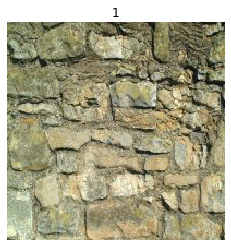

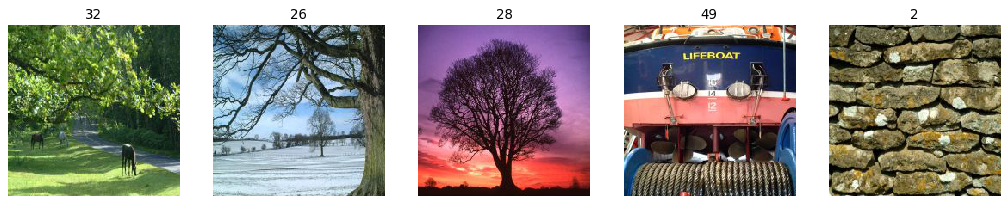

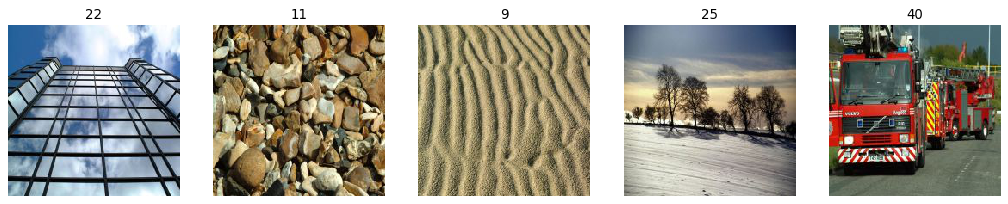

In [16]:
display_most_simil(1, 10, coeffs_list)

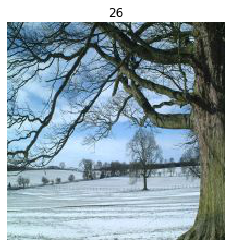

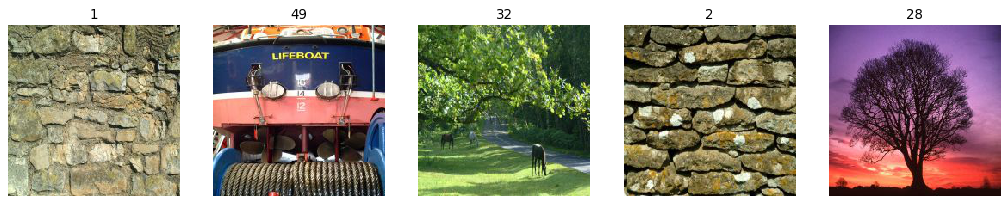

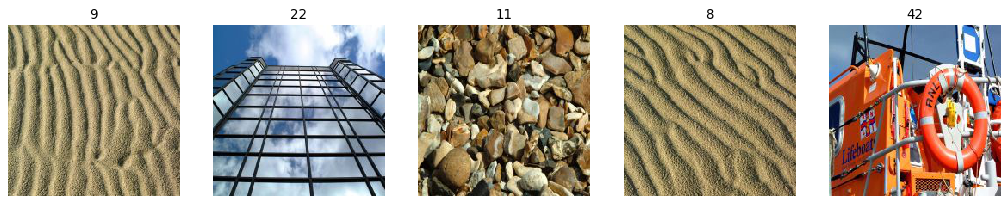

In [17]:
display_most_simil(26, 10, coeffs_list)